# CMEMS Reanalysis Model datasets, Temperature at Sea Surface from 1987 to 2019
## File types for Temperature at Sea Surface: 1D: .nc <br>
### Box, violin and cat plots 

Prefered library is Seaborn  

<ol>
<li>Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea</li>
<li>Temperature at Sea Surfacefrom 1987 to 2019 over Adriatic Sea within Histogram</li>
<li>Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea-Season Winter</li>
<li>Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea-Season Summer</li>
<li>Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea-Season Spring</li>
<li>Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea-Season Autumn</li>
<li>Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea-Box Plot by Season</li>
<li>Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea-Violin Plot by Season</li>
<li>TS CMEMS Reanalysis Sea Surface Temperature from1987 to 2019 AdriaticSea Seasonal Means</li>



</ol>


In [1]:
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline 

import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
from statsmodels.tsa.stattools import adfuller, kpss
import os
import sys
import json
import requests
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ds = xr.open_dataset('TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:  (time: 12053)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 ...
Data variables:
    thetao   (time) float32 ...

In [4]:
rcParams['figure.figsize'] = 18, 8
#rcParams['lines.linewidth'] = 1

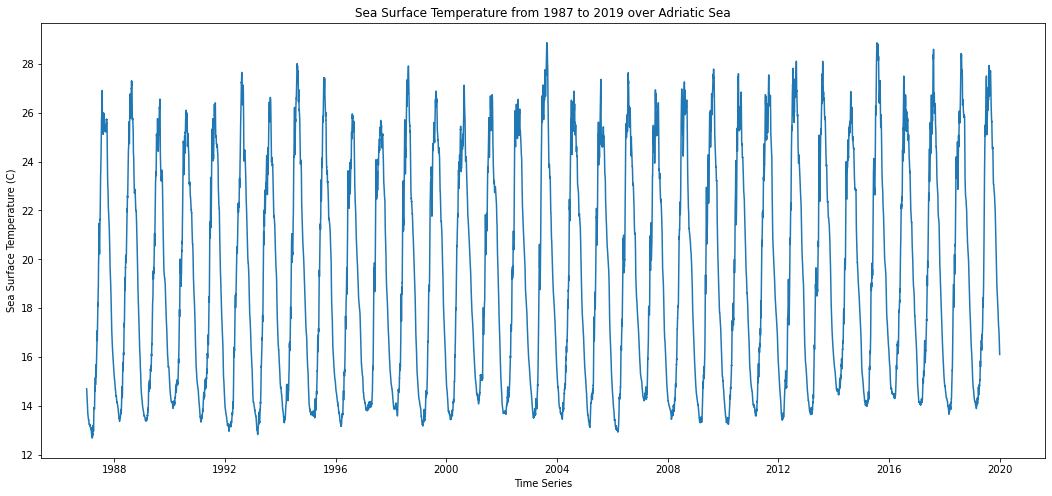

In [5]:
#plot in time series
plt.plot(ds.time,ds.thetao.squeeze());

plt.xlabel('Time Series')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('Sea Surface Temperature from 1987 to 2019 over Adriatic Sea');

### from XARRAY to PANDAS conversion

<ul>
<li>Data list(datasets) by variable thetao in coords depth and time</li>
<li>Datasets to dataframe in time series indexed in time</li>
</ul>

In [6]:
df = ds.to_dataframe()
df.head()

,depth,thetao
time,,
1987-01-01 12:00:00,1.018237,14.696689
1987-01-02 12:00:00,1.018237,14.670896
1987-01-03 12:00:00,1.018237,14.636758
1987-01-04 12:00:00,1.018237,14.561996
1987-01-05 12:00:00,1.018237,14.448793


In [7]:
#df.thetao.plot();


In [8]:

df = ds.to_dataframe().reset_index().set_index('time')
df.head()

,depth,thetao
time,,
1987-01-01 12:00:00,1.018237,14.696689
1987-01-02 12:00:00,1.018237,14.670896
1987-01-03 12:00:00,1.018237,14.636758
1987-01-04 12:00:00,1.018237,14.561996
1987-01-05 12:00:00,1.018237,14.448793


### Sea Surface Temperature markered in 12 months

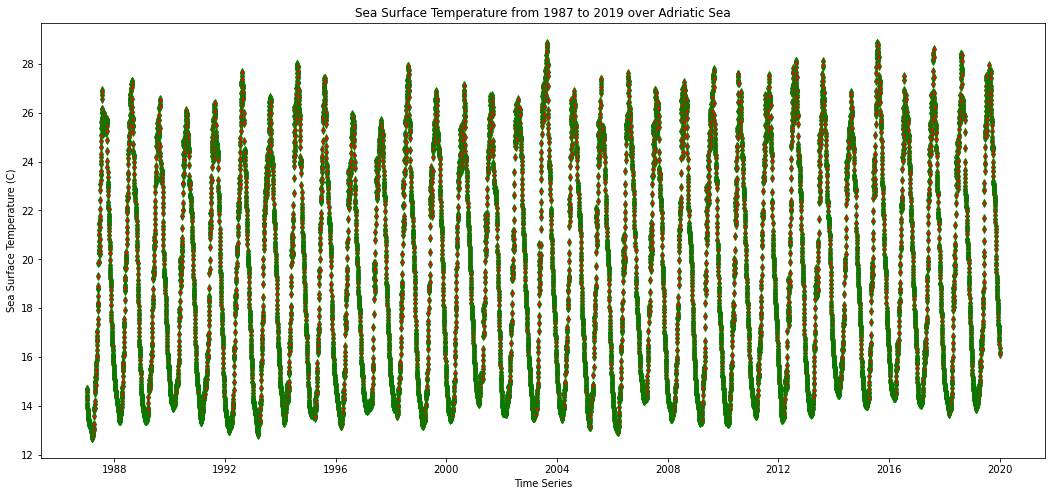

In [9]:

plt.plot(df.index,df.thetao, color='red', linestyle='', 
         marker='d', markerfacecolor='r', markeredgecolor='g', markersize=5)


plt.xlabel('Time Series')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('Sea Surface Temperature from 1987 to 2019 over Adriatic Sea');

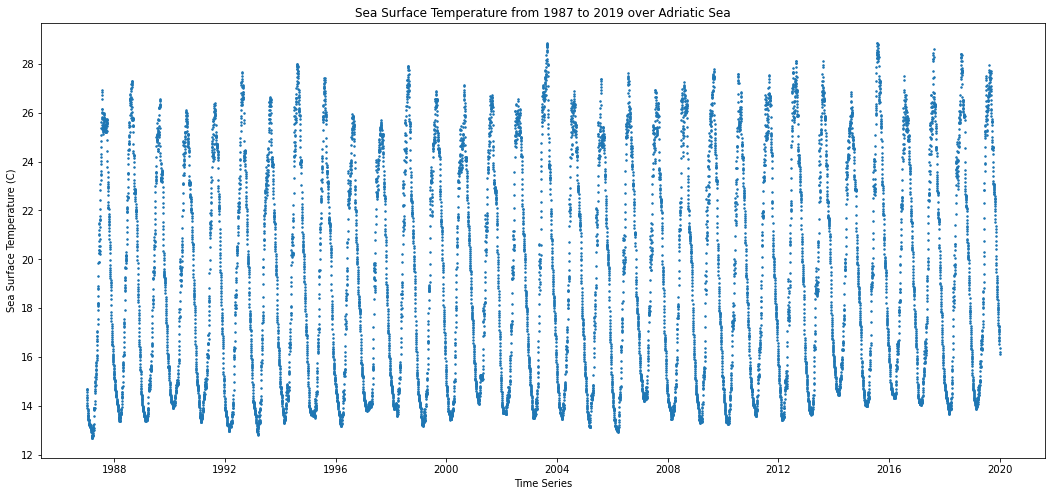

In [10]:
plt.plot(df.thetao, linestyle='', marker='.', markersize=3)
plt.xlabel('Time Series')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('Sea Surface Temperature from 1987 to 2019 over Adriatic Sea');

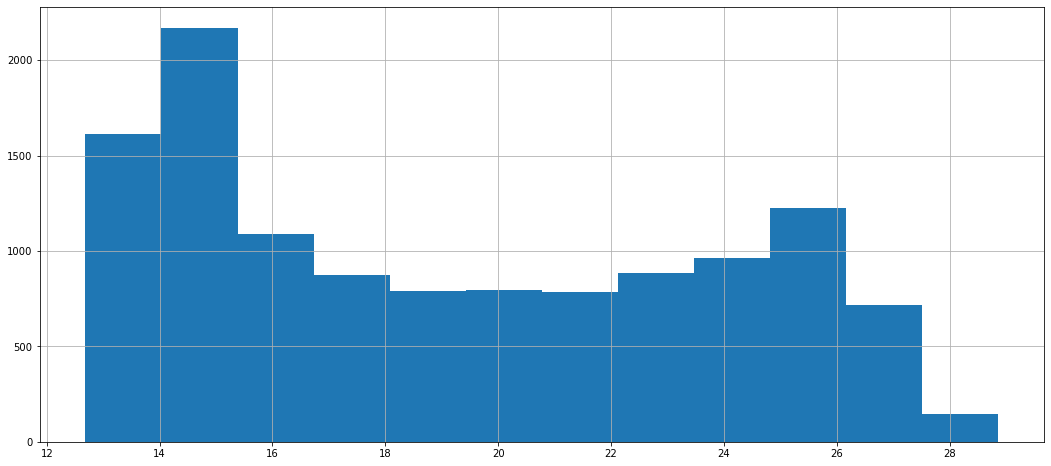

In [11]:
df['thetao'].hist(bins=12);


In [12]:
import seaborn as sns


<ul>
<li>Group by winter season: DJF</li>
<li>Conversion to dataframe</li>
</ul>

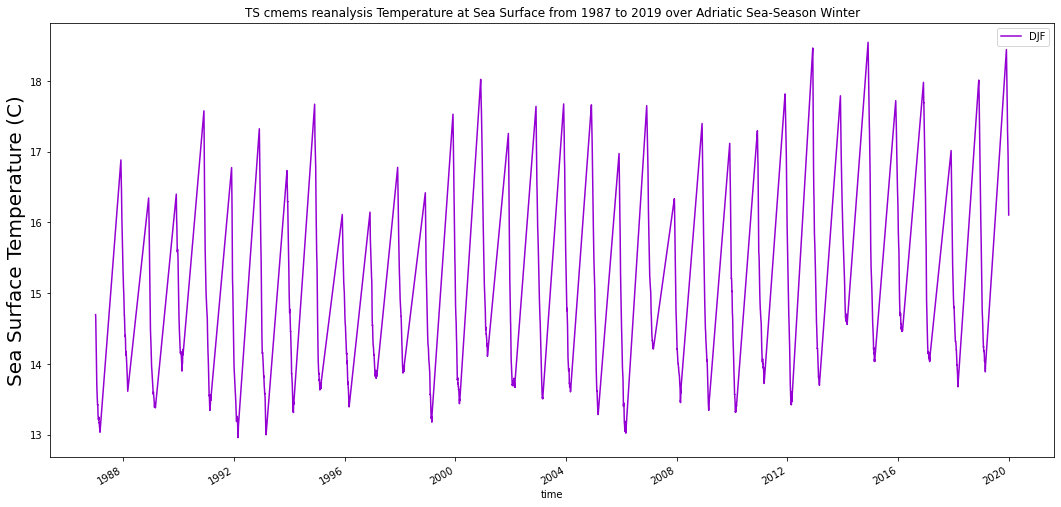

In [13]:
ds1_season_inv = ds['thetao'].groupby('time.season')['DJF']

ds1_season_inv.plot(color='darkviolet', label='DJF')
title = "TS cmems reanalysis Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea-Season Winter"
plt.ylabel('Sea Surface Temperature (C)',fontsize=20)
plt.title(title)
plt.legend();

In [14]:
df1_season_inv = ds1_season_inv.to_dataframe()
df1_season_inv

,depth,thetao
time,,
1987-01-01 12:00:00,1.018237,14.696689
1987-01-02 12:00:00,1.018237,14.670896
1987-01-03 12:00:00,1.018237,14.636758
1987-01-04 12:00:00,1.018237,14.561996
1987-01-05 12:00:00,1.018237,14.448793
...,...,...
2019-12-27 12:00:00,1.018237,16.640701
2019-12-28 12:00:00,1.018237,16.531431
2019-12-29 12:00:00,1.018237,16.363058


<ul>
<li>Group by summer season: JJA</li>
<li>Conversion to dataframe</li>
</ul>

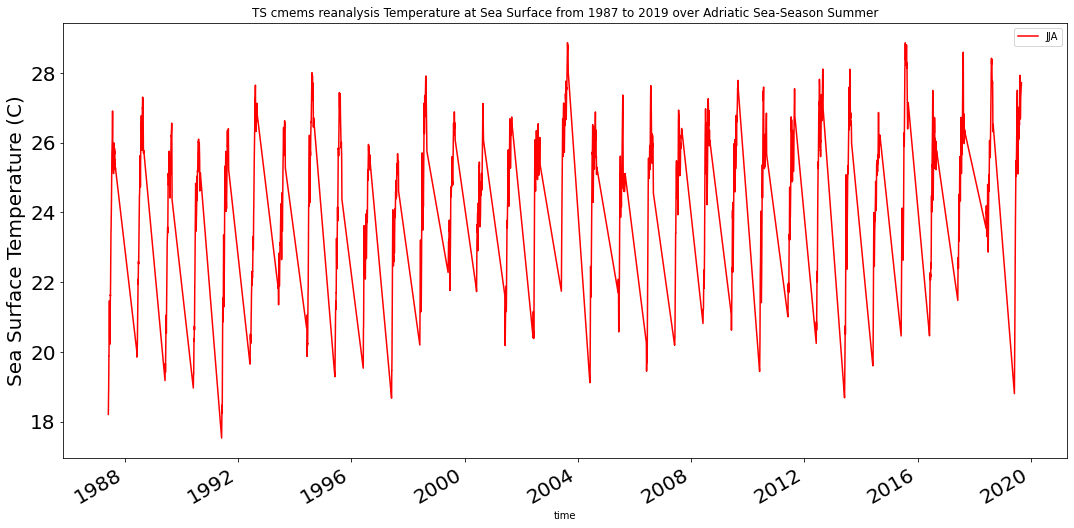

In [15]:
df1_season_est = ds['thetao'].groupby('time.season')['JJA']
df1_season_est.plot(color='r', label='JJA') 
title = "TS cmems reanalysis Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea-Season Summer"
plt.ylabel('Sea Surface Temperature (C)',fontsize=20)
plt.title(title)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend();

In [16]:
df1_season_est = df1_season_est.to_dataframe()
df1_season_est

,depth,thetao
time,,
1987-06-01 12:00:00,1.018237,18.209923
1987-06-02 12:00:00,1.018237,18.487085
1987-06-03 12:00:00,1.018237,18.779093
1987-06-04 12:00:00,1.018237,18.819464
1987-06-05 12:00:00,1.018237,18.891378
...,...,...
2019-08-27 12:00:00,1.018237,27.550367
2019-08-28 12:00:00,1.018237,27.648264
2019-08-29 12:00:00,1.018237,27.646145


<ul>
<li>Group by spring season: MAM</li>
<li>Conversion to dataframe</li>
</ul>

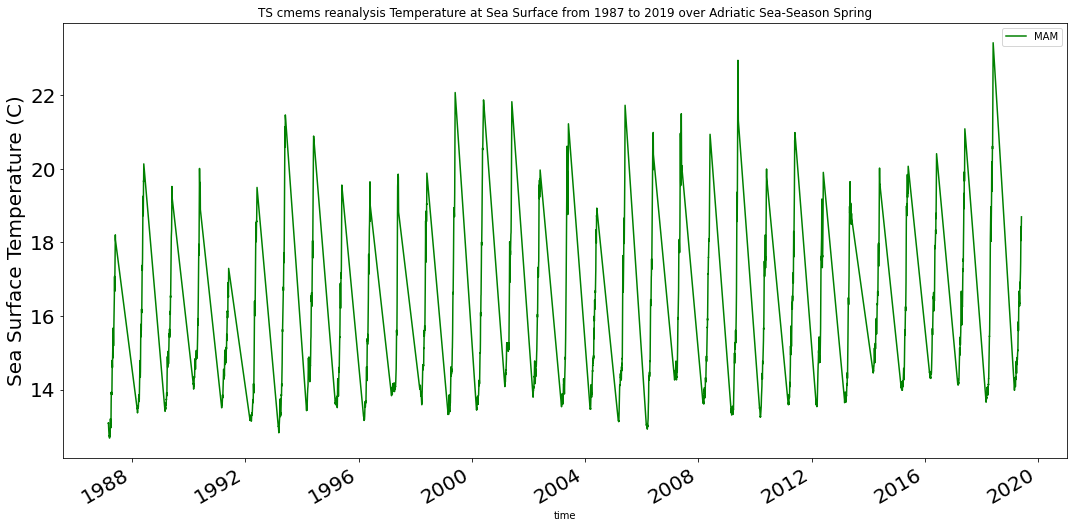

In [17]:
df1_season_prim = ds['thetao'].groupby('time.season')['MAM']
df1_season_prim.plot(color='g', label='MAM')

title = "TS cmems reanalysis Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea-Season Spring"
plt.ylabel('Sea Surface Temperature (C)',fontsize=20)
plt.title(title)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend();

In [18]:
df1_season_prim = df1_season_prim.to_dataframe()
df1_season_prim

,depth,thetao
time,,
1987-03-01 12:00:00,1.018237,13.085732
1987-03-02 12:00:00,1.018237,13.101664
1987-03-03 12:00:00,1.018237,13.066791
1987-03-04 12:00:00,1.018237,13.006888
1987-03-05 12:00:00,1.018237,12.958860
...,...,...
2019-05-27 12:00:00,1.018237,18.052254
2019-05-28 12:00:00,1.018237,18.169252
2019-05-29 12:00:00,1.018237,18.375246


<ul>
<li>Group by autumn season: SON</li>
<li>Conversion to dataframe</li>
</ul>

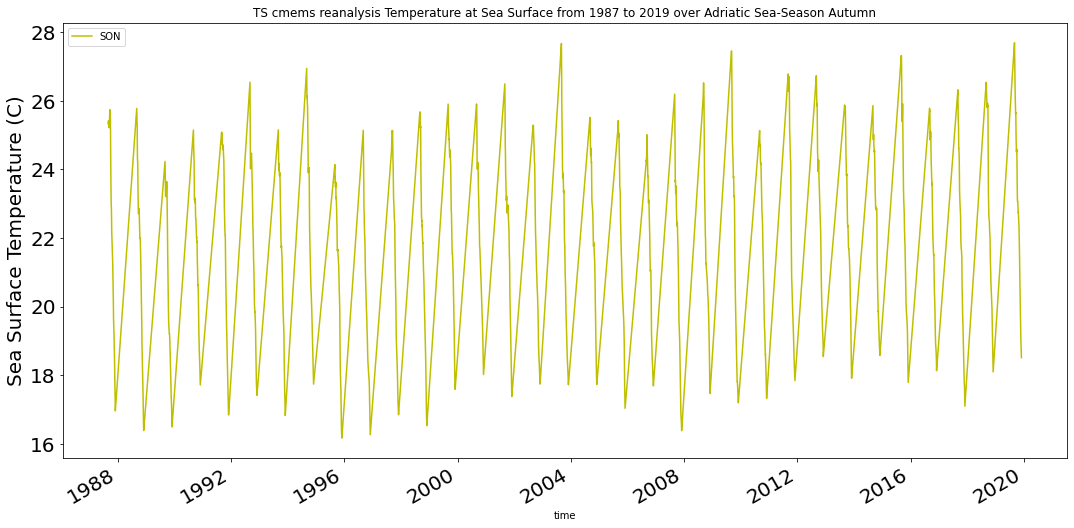

In [19]:
df1_season_aut = ds['thetao'].groupby('time.season')['SON']
df1_season_aut.plot(color='y', label='SON')
title = "TS cmems reanalysis Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea-Season Autumn"
plt.ylabel('Sea Surface Temperature (C)',fontsize=20)
plt.title(title)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend();

In [20]:
df1_season_aut = df1_season_aut.to_dataframe()
df1_season_aut

,depth,thetao
time,,
1987-09-01 12:00:00,1.018237,25.323425
1987-09-02 12:00:00,1.018237,25.414513
1987-09-03 12:00:00,1.018237,25.418957
1987-09-04 12:00:00,1.018237,25.334354
1987-09-05 12:00:00,1.018237,25.379837
...,...,...
2019-11-26 12:00:00,1.018237,18.792850
2019-11-27 12:00:00,1.018237,18.741970
2019-11-28 12:00:00,1.018237,18.657505


In [21]:

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse 
import matplotlib as mpl


### PLOTS: Box and Violin Plot in TS by Season

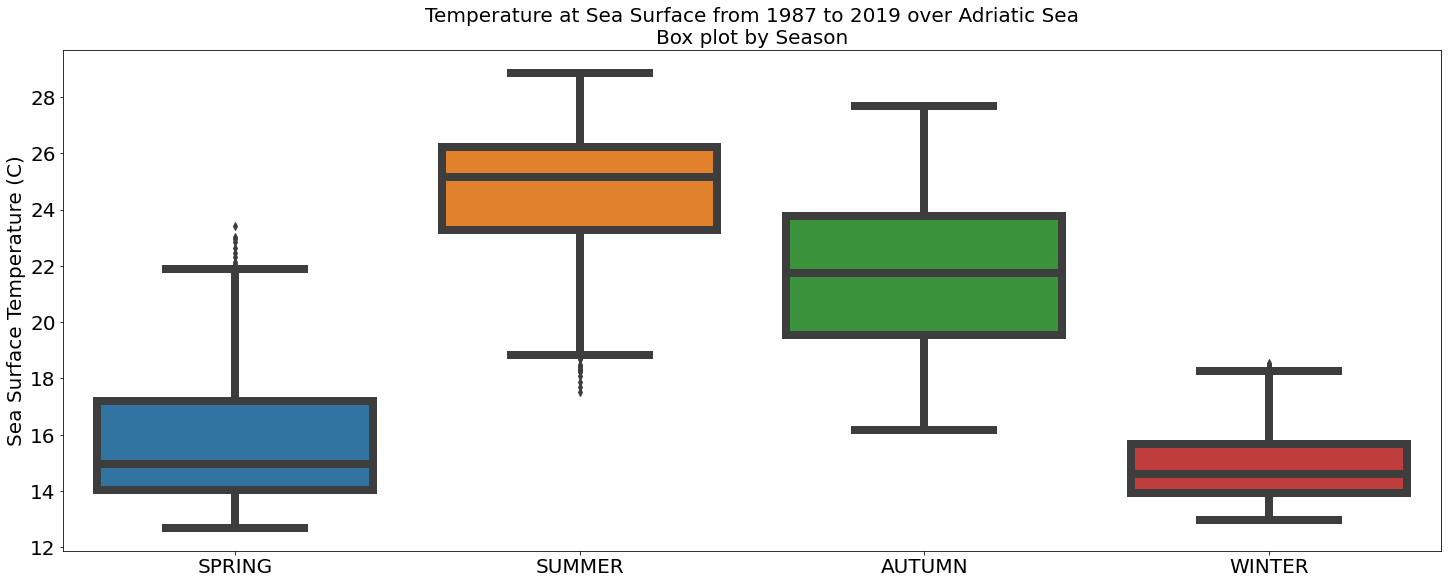

In [22]:
fig,axes = plt.subplots(1,figsize=(20, 8),constrained_layout=True, linewidth=10)


#sns.boxplot(data=[df1_season_est.thetao,df1_season_inv.thetao,df1_season_prim.thetao,df1_season_aut.thetao], palette="tab10")
sns.boxplot(data=[df1_season_prim.thetao,df1_season_est.thetao,df1_season_aut.thetao,df1_season_inv.thetao], palette="tab10",linewidth=8)
plt.ylabel('Sea Surface Temperature (C)',fontsize=20)

axes.set_xticklabels(['SPRING', 'SUMMER',
                    'AUTUMN', 'WINTER'])
axes.set_title('Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea\nBox plot by Season', fontsize=20); 
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.savefig('Temperature at Sea Surface-Boxplot by Season.png')
plt.show()
plt.close()

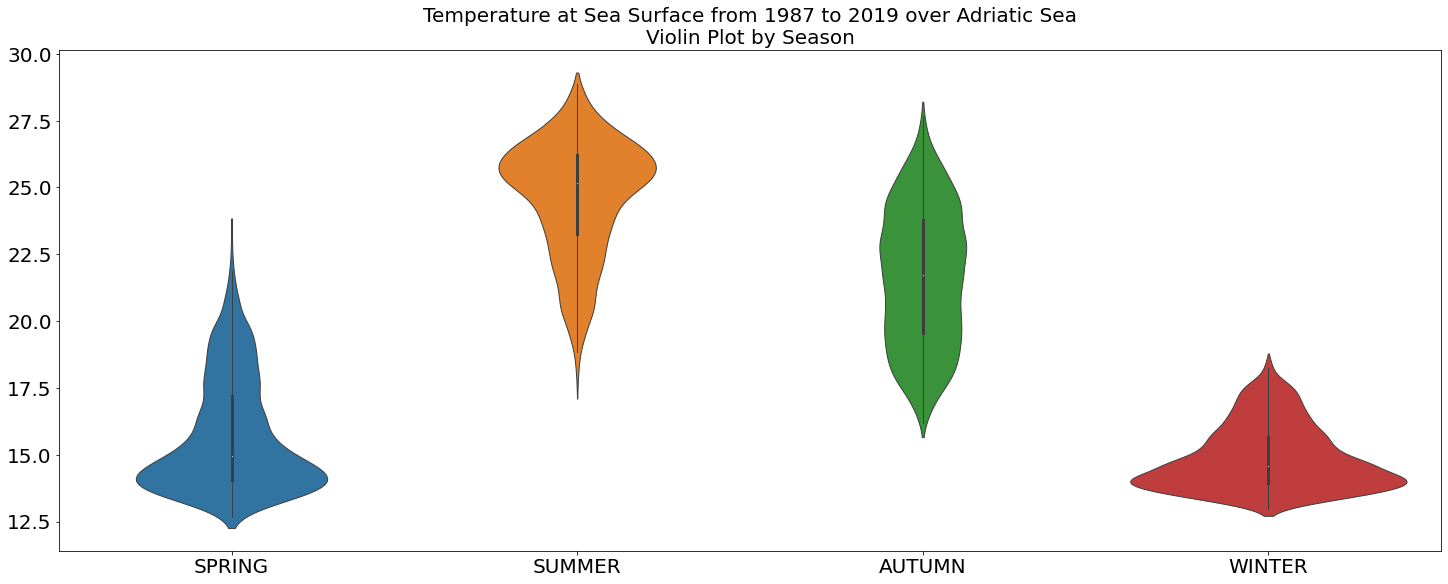

In [23]:
fig,axes = plt.subplots(1,figsize=(20, 8),constrained_layout=True, linewidth=10)


#sns.boxplot(data=[df1_season_est.thetao,df1_season_inv.thetao,df1_season_prim.thetao,df1_season_aut.thetao], palette="tab10")
sns.violinplot(data=[df1_season_prim.thetao,df1_season_est.thetao,df1_season_aut.thetao,df1_season_inv.thetao], palette="tab10",bw=.2, cut=1, linewidth=1)

axes.set_xticklabels(['SPRING', 'SUMMER',
                    'AUTUMN', 'WINTER'])
axes.set_title('Temperature at Sea Surface from 1987 to 2019 over Adriatic Sea\nViolin Plot by Season', fontsize=20); 
plt.xticks(size = 20)
plt.yticks(size = 20)
#plt.savefig('Temperature at Sea Surface-Boxplot by Season.png')
plt.show()
plt.close()

In [24]:
fyy_dt_inv = df1_season_inv.groupby(pd.Grouper(freq='Y')).mean()
fyy_dt_inv

,depth,thetao
time,,
1987-12-31,1.018237,14.386896
1988-12-31,1.018237,14.644769
1989-12-31,1.018237,14.361849
1990-12-31,1.018237,14.821840
1991-12-31,1.018237,14.434675
1992-12-31,1.018237,14.315861
1993-12-31,1.018237,14.513245
1994-12-31,1.018237,14.881816
1995-12-31,1.018237,14.494774


In [25]:
fyy_dt_inv.shape

(33, 2)

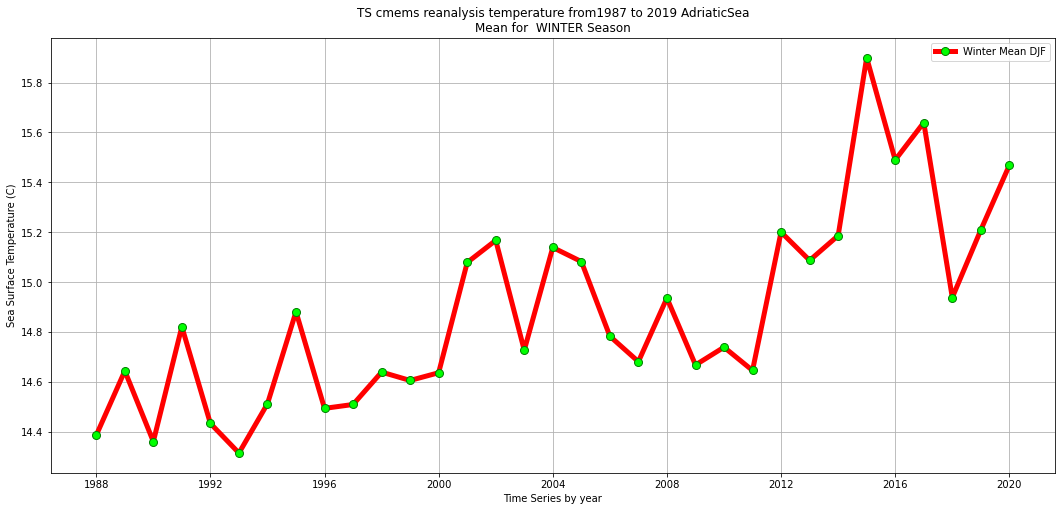

In [26]:
plt.plot(fyy_dt_inv.thetao, color='red', marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8,label='Winter Mean DJF', linewidth=5)
plt.legend();
plt.grid()

plt.xlabel('Time Series by year')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('TS cmems reanalysis temperature from1987 to 2019 AdriaticSea\nMean for  WINTER Season');

In [27]:
fyy_dt_est = df1_season_est.groupby(pd.Grouper(freq='Y')).mean()
fyy_dt_est

,depth,thetao
time,,
1987-12-31,1.018237,23.694963
1988-12-31,1.018237,24.431070
1989-12-31,1.018237,23.712257
1990-12-31,1.018237,23.805128
1991-12-31,1.018237,23.366247
1992-12-31,1.018237,23.943205
1993-12-31,1.018237,24.137789
1994-12-31,1.018237,24.851555
1995-12-31,1.018237,24.435379


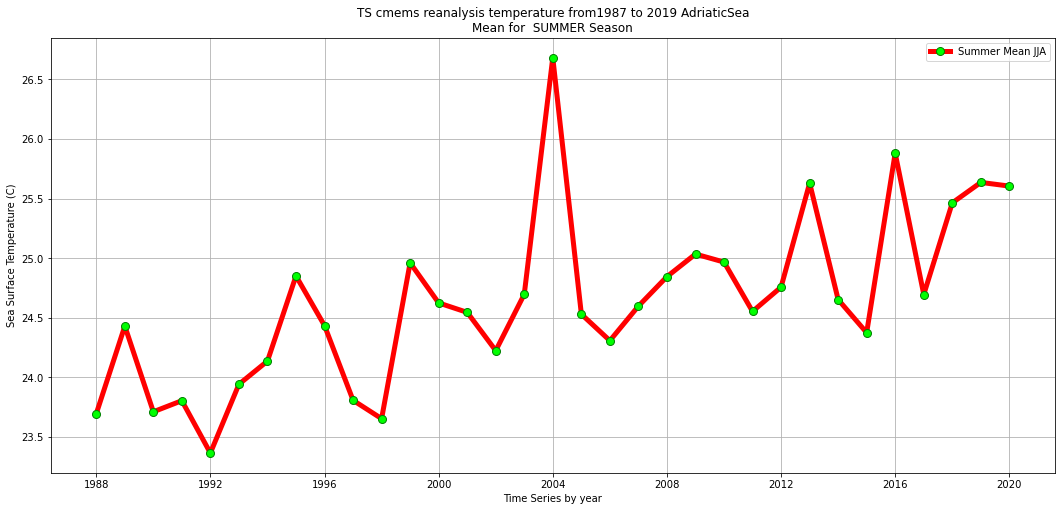

In [28]:
#plt.plot(df1_season_est.thetao,color='k',linewidth=1, label='TS Summer JJA')
plt.plot(fyy_dt_est.thetao, color='red', marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8,label='Summer Mean JJA', linewidth=5)
plt.legend();
plt.grid()
plt.xlabel('Time Series by year')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('TS cmems reanalysis temperature from1987 to 2019 AdriaticSea\nMean for  SUMMER Season');

In [29]:
fyy_dt_prim = df1_season_prim.groupby(pd.Grouper(freq='Y')).mean()
fyy_dt_prim

,depth,thetao
time,,
1987-12-31,1.018237,14.504118
1988-12-31,1.018237,15.430908
1989-12-31,1.018237,15.397736
1990-12-31,1.018237,15.964182
1991-12-31,1.018237,14.910305
1992-12-31,1.018237,15.122613
1993-12-31,1.018237,15.409559
1994-12-31,1.018237,15.590176
1995-12-31,1.018237,14.938203


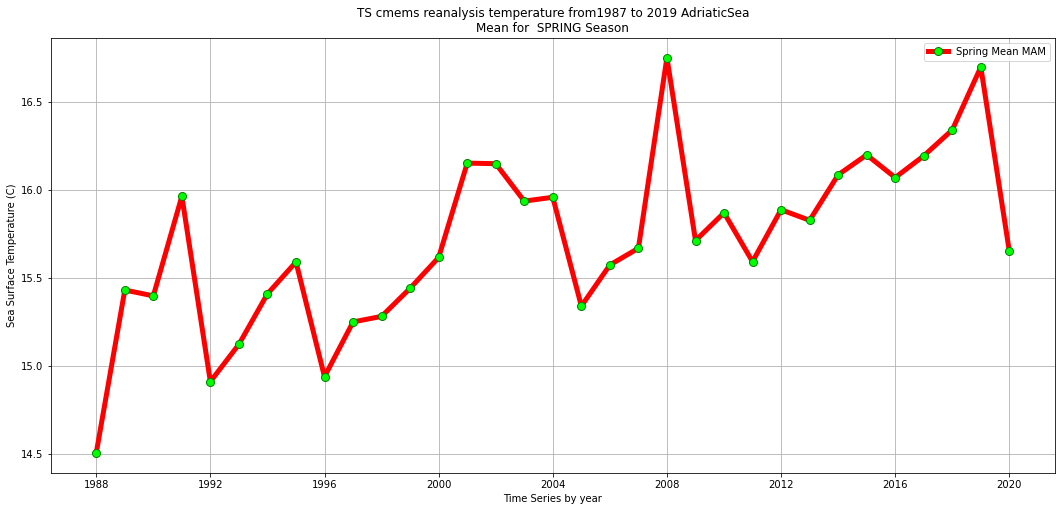

In [30]:
#plt.plot(df1_season_prim.thetao,color='k',linewidth=1, label='TS Spring MAM')
plt.plot(fyy_dt_prim.thetao, color='red', marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8,label='Spring Mean MAM', linewidth=5)
plt.legend();
plt.grid()

plt.xlabel('Time Series by year')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('TS cmems reanalysis temperature from1987 to 2019 AdriaticSea\nMean for  SPRING Season');

In [31]:
fyy_dt_aut = df1_season_aut.groupby(pd.Grouper(freq='Y')).mean()
fyy_dt_aut

,depth,thetao
time,,
1987-12-31,1.018237,22.159573
1988-12-31,1.018237,21.266968
1989-12-31,1.018237,20.487349
1990-12-31,1.018237,21.502846
1991-12-31,1.018237,21.617373
1992-12-31,1.018237,21.556080
1993-12-31,1.018237,21.278425
1994-12-31,1.018237,22.060490
1995-12-31,1.018237,20.733463


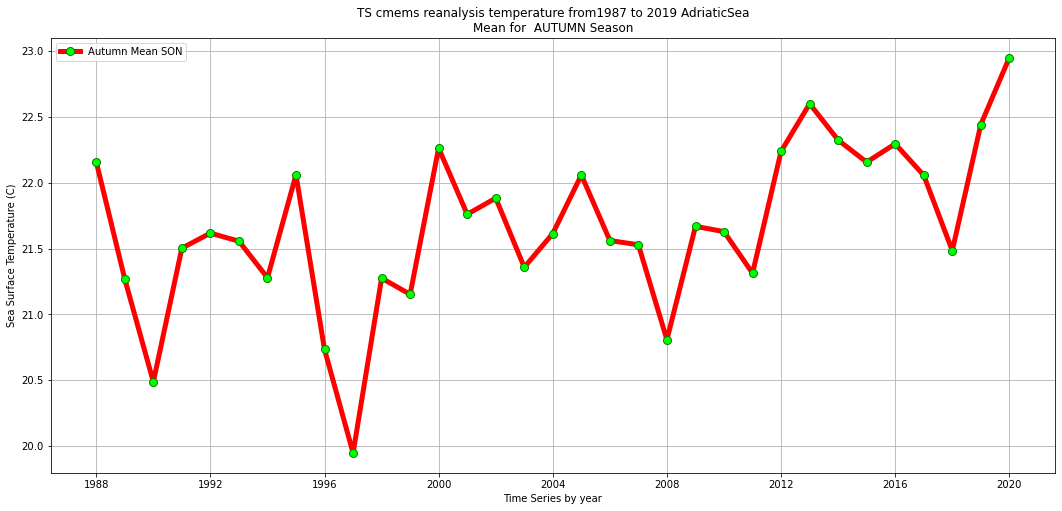

In [32]:
#plt.plot(df1_season_aut.thetao,color='k',linewidth=1, label='TS Autumn SON')
plt.plot(fyy_dt_aut.thetao, color='red', marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8,label='Autumn Mean SON', linewidth=5)
plt.legend();
plt.grid()

plt.xlabel('Time Series by year')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('TS cmems reanalysis temperature from1987 to 2019 AdriaticSea\nMean for  AUTUMN Season');

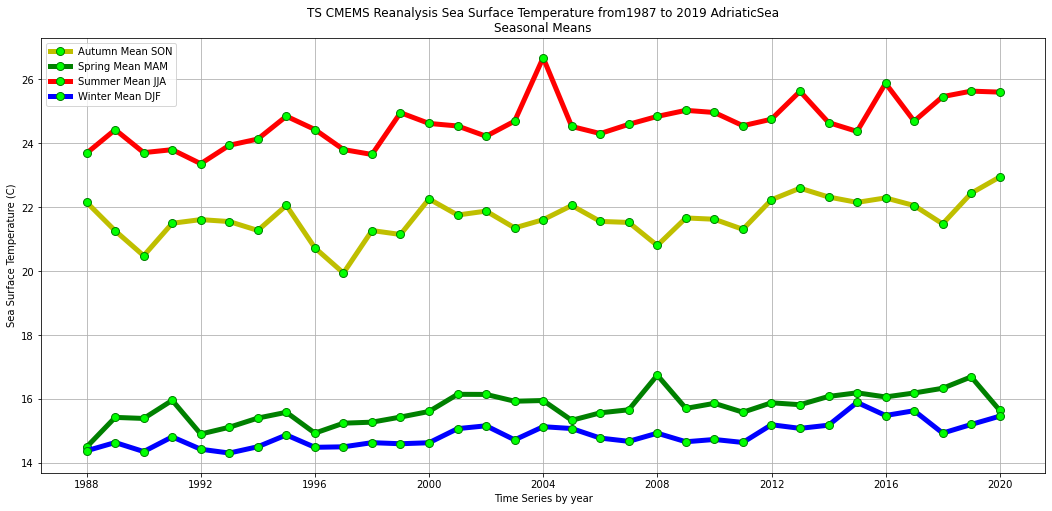

In [33]:
plt.plot(fyy_dt_aut.thetao, color='y', marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8,label='Autumn Mean SON', linewidth=5)
plt.legend();
plt.plot(fyy_dt_prim.thetao, color='g', marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8,label='Spring Mean MAM', linewidth=5)
plt.legend();

plt.plot(fyy_dt_est.thetao, color='red', marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8,label='Summer Mean JJA', linewidth=5)
plt.legend();

plt.plot(fyy_dt_inv.thetao, color='b', marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8,label='Winter Mean DJF', linewidth=5)
plt.legend();

plt.grid()

plt.xlabel('Time Series by year')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('TS CMEMS Reanalysis Sea Surface Temperature from1987 to 2019 AdriaticSea\nSeasonal Means');